# Long Term Open Source Metric Analysis

In [1]:
# Kafka Method Analysis

In [2]:
kafka_versions = ["3.6.0","3.5.1","3.5.0","3.4.1","3.4.0","3.3.2","3.3.1",
                "3.2.3","3.2.1","3.2.0","3.1.2","3.1.1","3.1.0","3.0.2","3.0.1","3.0.0",
                "2.8.2","2.8.1","2.8.0","2.7.2","2.7.1","2.7.0","2.6.3","2.6.2","2.6.1",
                "2.6.0","2.5.1","2.5.0","2.4.1","2.4.0","2.3.1","2.3.0",
                "2.2.2","2.2.1","2.2.0","2.1.1","2.1.0","2.0.1","2.0.0","1.1.1","1.1.0",
                "1.0.2","1.0.1","1.0.0","0.11.0.3","0.11.0.2","0.11.0.1","0.11.0.0",
                "0.10.2.2","0.10.2.1","0.10.2.0","0.10.1.1","0.10.1.0","0.10.0.0",
                "0.9.0.1","0.9.0.0","0.8.2.2","0.8.2.1","0.8.2.0","0.8.1.9",
                "0.8.1.1","0.8.1","0.8.0","0.7.9"
            ]


neededColumns =['cbo','cboModified','fanin','fanout','wmc','rfc','loc','loopQty'
                      #,'returnsQty','variablesQty','parametersQty','methodsInvokedQty',
                      #'methodsInvokedLocalQty','methodsInvokedIndirectLocalQty',
                      #'comparisonsQty','tryCatchQty','parenthesizedExpsQty',
                      #'stringLiteralsQty','numbersQty','assignmentsQty','mathOperationsQty',
                      #'maxNestedBlocksQty','anonymousClassesQty','innerClassesQty',
                      #'lambdasQty','uniqueWordsQty','modifiers','logStatementsQty'
                     ]



In [3]:
import pandas as pd

classCkMetricsAllVersionsDf = pd.read_csv('DataSource/kafka_AllCkMetricsAllVersionsMethod.csv')

In [4]:
kafka_bugsNewFeatureImprovementsDf = pd.read_csv('DataSource/kafka_bugsNewFeatureImprovements.csv')

In [5]:
cleanedCkMetricsAllVersionsDf = (classCkMetricsAllVersionsDf
    .loc[~classCkMetricsAllVersionsDf['class'].str.contains("Test")]
    .loc[~classCkMetricsAllVersionsDf['class'].str.contains("test")]
    .loc[~classCkMetricsAllVersionsDf['class'].str.contains("TEST")]
    .loc[~classCkMetricsAllVersionsDf['file'].str.contains("src/test/")]
) 

In [16]:
print("Filtered class count:", cleanedCkMetricsAllVersionsDf.shape[0])
print("Versioned bug count:", kafka_bugsNewFeatureImprovementsDf['ResolvedBug'].sum())
print("Versioned new feature count:", kafka_bugsNewFeatureImprovementsDf['New_Feature'].sum())
print("Versioned improvement count:", kafka_bugsNewFeatureImprovementsDf['Improvement'].sum())


Filtered class count: 859470
Versioned bug count: 4162
Versioned new feature count: 143
Versioned improvement count: 1473


In [7]:
meanCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumns].mean()
stdCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumns].std()
maxCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumns].max()

In [8]:
def calculate_value(version):
    parts = version.split('.') 
    parts = [int(part) for part in parts]
    
    if len(parts) == 3:
        result = parts[0] * 1000 + parts[1] * 100 + parts[2] * 10
    else:
        result = parts[0] * 1000 + parts[1] * 100 + parts[2] * 10 + parts[3] * 1
    return result

meanCkGroupedVersions['numericVersion'] = meanCkGroupedVersions['Version'].apply(calculate_value)
stdCkGroupedVersions['numericVersion'] = stdCkGroupedVersions['Version'].apply(calculate_value)
maxCkGroupedVersions['numericVersion'] = maxCkGroupedVersions['Version'].apply(calculate_value)

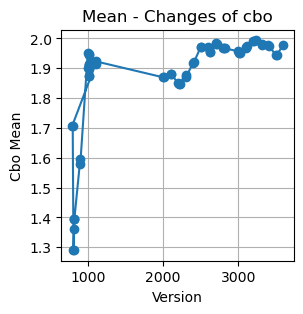

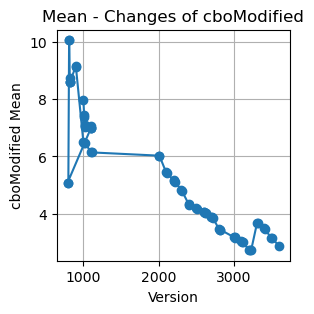

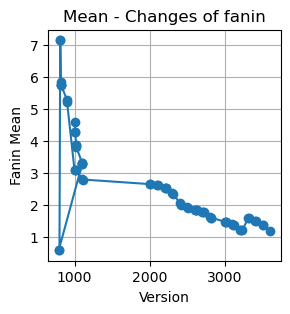

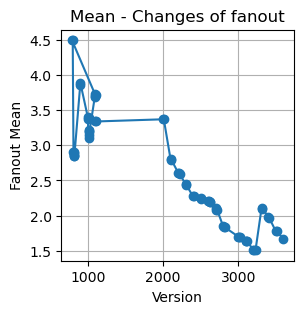

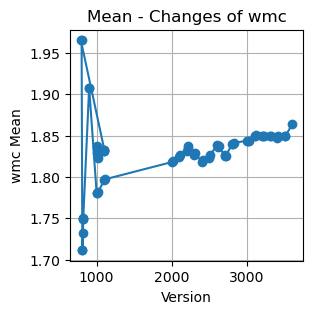

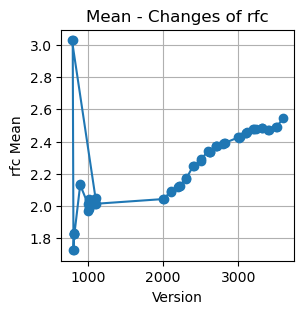

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['cbo'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Cbo Mean')
plt.title('Mean - Changes of cbo')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Mean')
plt.title('Mean - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Mean')
plt.title('Mean - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Mean')
plt.title('Mean - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('wmc Mean')
plt.title('Mean - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['rfc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('rfc Mean')
plt.title('Mean - Changes of rfc')
plt.grid(True)
plt.show()

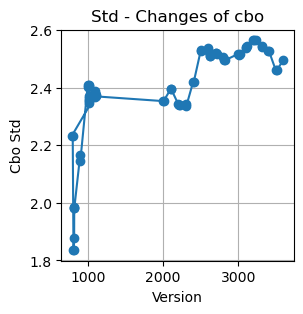

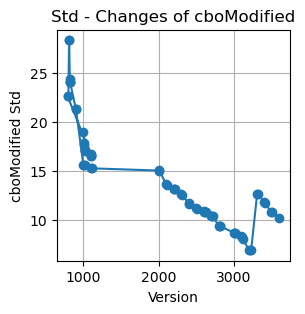

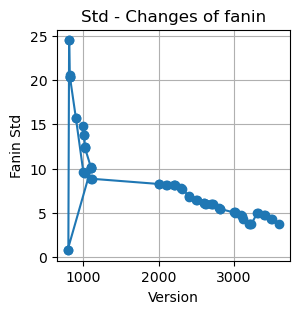

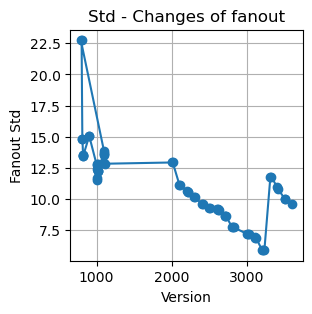

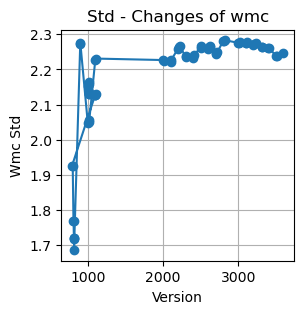

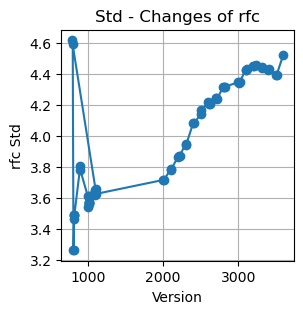

In [10]:
plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['cbo'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Cbo Std')
plt.title('Std - Changes of cbo')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Std')
plt.title('Std - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Std')
plt.title('Std - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Std')
plt.title('Std - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Wmc Std')
plt.title('Std - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['rfc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('rfc Std')
plt.title('Std - Changes of rfc')
plt.grid(True)
plt.show()


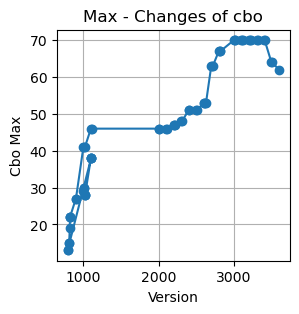

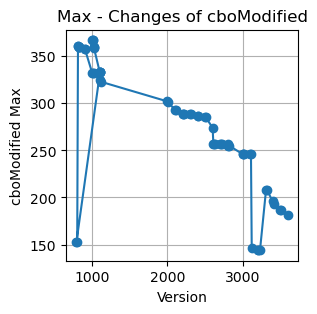

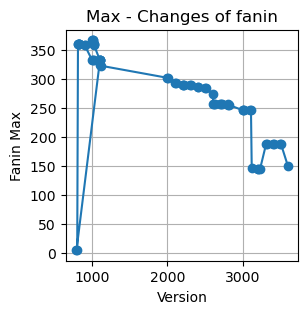

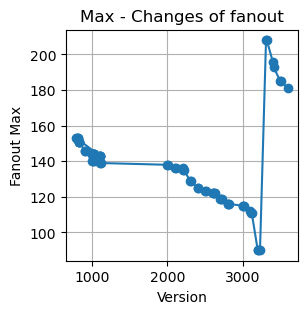

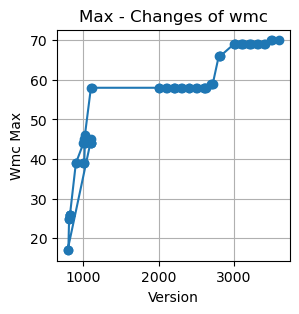

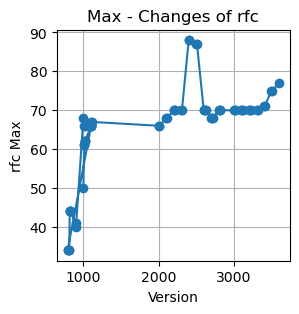

In [11]:
plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['cbo'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Cbo Max')
plt.title('Max - Changes of cbo')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Max')
plt.title('Max - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Max')
plt.title('Max - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Max')
plt.title('Max - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Wmc Max')
plt.title('Max - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['rfc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('rfc Max')
plt.title('Max - Changes of rfc')
plt.grid(True)
plt.show()

In [12]:
mergedMeanCountsDf = pd.merge(meanCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')
mergedStdCountsDf = pd.merge(stdCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')
mergedMaxCountsDf = pd.merge(maxCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')


In [13]:
t_mergedMeanBugCountsDf = mergedMeanCountsDf.drop(columns=['Version'])
t_mergedStdBugCountsDf = mergedStdCountsDf.drop(columns=['Version'])
t_mergedMaxBugCountsDf = mergedMaxCountsDf.drop(columns=['Version'])

t_mergedMeanBugCountsDf.head()

,cbo,cboModified,fanin,fanout,wmc,rfc,loc,loopQty,numericVersion,New_Feature,Improvement,ResolvedBug,ExistingBug
0,1.900601,7.976600,4.598882,3.377718,1.828536,1.968938,6.400704,0.146821,1000,3,93,189,131
1,1.872917,7.447354,4.299396,3.147958,1.837392,1.990112,6.434536,0.148141,1010,8,56,131,24
2,1.872628,7.384489,4.284672,3.099818,1.834489,1.983759,6.419526,0.147628,1011,0,3,24,125
3,1.911640,7.085480,3.873143,3.212337,1.823128,2.025462,6.337678,0.139588,1020,4,56,125,26
4,1.914173,7.066032,3.868389,3.197643,1.828045,2.040496,6.357963,0.141130,1021,0,1,26,25


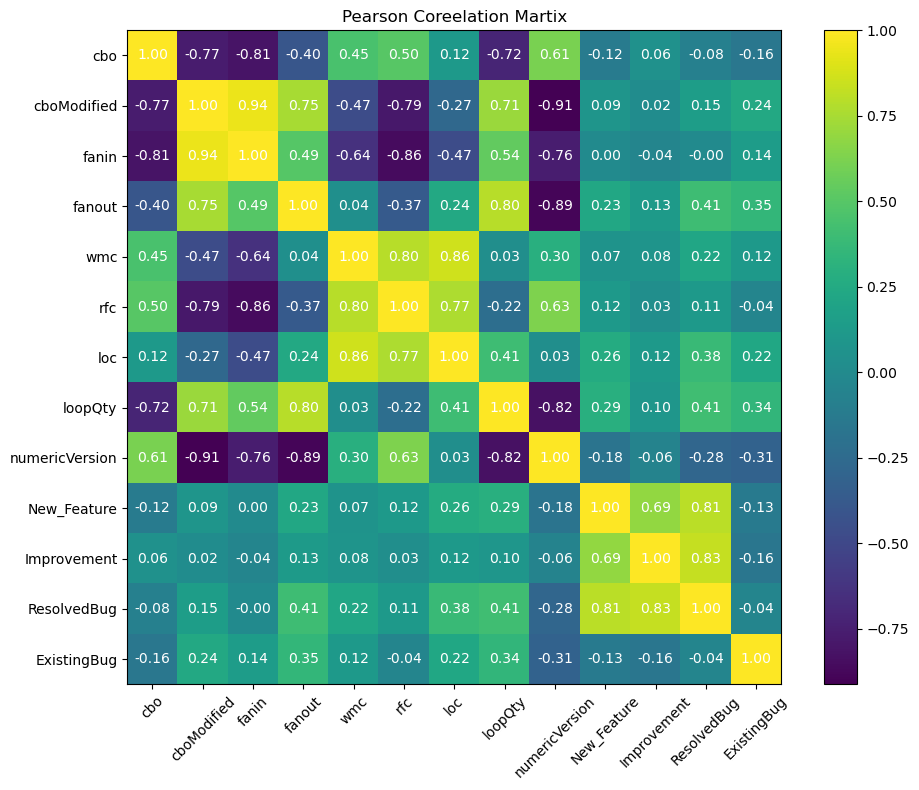

In [14]:
import numpy as np
import matplotlib.pyplot as plt

correlation_matrix = t_mergedMeanBugCountsDf.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar()
plt.title('Pearson Coreelation Martix')
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.index)
plt.tight_layout()
plt.show()


In [15]:
import statsmodels.api as sm


t_mergedMeanBugCountsDf = mergedMeanCountsDf.drop(columns=['Version'])
t_mergedStdBugCountsDf = mergedStdCountsDf.drop(columns=['Version'])
t_mergedMaxBugCountsDf = mergedMaxCountsDf.drop(columns=['Version'])


df = t_mergedMeanBugCountsDf;

X = df[neededColumns]  # Independent variables
y = df['ExistingBug']  # Dependent variable

# Create and fit the model
model = sm.OLS(y, X).fit()

# Print the coefficients
print(model.params)


cbo             -20.255396
cboModified       4.504671
fanin             1.634697
fanout            2.869974
wmc            -659.333779
rfc            -232.648073
loc             322.825347
loopQty       -2156.904582
dtype: float64
